In [4]:
from importlib import reload
import numpy as np
import folium
import pandas as pd
#import seaborn as sns
from random import sample
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import src.localization as localization
reload(localization)
from src.localization import read_data
from src.localization import plot_coeffs
from src.localization import get_distance_in_meters
from src.localization import gen_regressors
from src.localization import gen_fingerprints
from src.localization import cell_search
from src.localization import result_map
from src.localization import gen_taf_struct
from src.localization import search_taf
from src.localization import get_errors
from src.localization import show_stats
from src.localization import show_stats_graphs
from src.localization import show_box_plots
import matplotlib.pyplot as plt
import time
import random
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
import datetime

1) Read Data
==
Read points and BTSs informations from CSV file

In [3]:
file = pd.read_csv('resources/data/data2.csv')
file

,pontoId,lat,lon,pathBTS1,pathBTS2,pathBTS3,pathBTS4,pathBTS5,pathBTS6,taBTS1,taBTS2,taBTS3,taBTS4,taBTS5,taBTS6
0,1,-8.077576,-34.899261,123.790000,88.956667,122.256667,126.890000,132.790000,138.056667,2,0,1,0,3,2
1,2,-8.077570,-34.899296,123.065000,104.540000,120.965000,137.140000,135.140000,139.015000,2,0,1,0,3,2
2,3,-8.077567,-34.899223,122.756667,88.723333,119.223333,124.256667,135.290000,132.923333,2,0,1,0,3,2
3,4,-8.077550,-34.899174,119.123333,82.056667,121.656667,126.856667,133.090000,133.923333,2,0,1,0,3,2
4,5,-8.077547,-34.899319,127.590000,110.890000,130.923333,138.290000,135.823333,135.123333,2,0,1,0,3,2
5,6,-8.077546,-34.899288,122.415000,91.190000,120.465000,128.165000,135.115000,134.040000,2,0,1,0,3,2
6,7,-8.077545,-34.899265,121.790000,89.240000,126.640000,127.340000,126.990000,140.140000,2,0,1,0,3,2
7,8,-8.077541,-34.899246,123.815000,87.890000,122.065000,126.740000,135.090000,138.590000,2,0,1,0,3,2
8,9,-8.077541,-34.899231,122.923333,84.523333,120.523333,125.856667,133.090000,135.990000,2,0,1,0,3,2
9,10,-8.077540,-34.899231,120.190000,81.890000,117.823333,124.290000,128.690000,137.956667,2,0,1,0,3,2


In [6]:
#positions, df_points_all = read_data('resources/data/LocTreino_Equipe_2.csv')
positions, df_points_all = read_data('resources/data/data2.csv')
df_points_test = pd.DataFrame()
all_indices = set(range(len(df_points_all)))
indices_test = sample(list(all_indices), int(len(df_points_all)/10))
indices_train = list(all_indices.difference(indices_test))
df_points = df_points_all.iloc[indices_train, :]
df_points_test = df_points_all.iloc[indices_test, :]

In [7]:
bts_positions, df_btss = read_data('resources/data/dados_BTSs.csv')

In [8]:
# import matplotlib.pyplot as plt

# # Time advance values above 7 are considered outliers
# ta_tresh = 7

# # print(df_points.columns[9:])
# # Remove all points with an outlier
# for column in df_points.columns[9:]:
#     print(df_points[df_points[column] >= ta_tresh][df_points.columns[9:]])
#     df_points = df_points[df_points[column] < ta_tresh]
# all_tas = list(df_points[df_points.columns[9:]].values.reshape((1,-1))[0])
# plt.plot(range(len(all_tas)), all_tas)
# plt.show()

## 1.1) Plot Original Points
Show the location of points and BTSs

In [43]:
# Calculate map center
center_lat = np.mean([lat for lat in bts_positions[:, 0]])
center_lon = np.mean([lon for lon in bts_positions[:, 1]])
original_pts_map = folium.Map(location=[center_lat, center_lon],zoom_start=15)

In [44]:
# Plot points
for location in positions:
    marker = folium.CircleMarker(location=location,
                                 radius=1,
                                 color='blue',
                                 fill_opacity=0.1)
    marker.add_to(original_pts_map)

    
# Calculate limits
lats = np.array(list(df_points['lat']))
lons = np.array(list(df_points['lon']))
max_lat = lats.max()
min_lat = lats.min()
max_lon = lons.max()
min_lon = lons.min()    

# Add corners
corners = [[max_lat, max_lon],
           [max_lat, min_lon],
           [min_lat, max_lon],
           [min_lat, min_lon]]

#draw area of interest
folium.PolyLine([corners[0], corners[1]],  color='black',weight=1, opacity=1).add_to(original_pts_map)
folium.PolyLine([corners[0], corners[2]],  color='black',weight=1, opacity=1).add_to(original_pts_map)
folium.PolyLine([corners[2], corners[3]],  color='black',weight=1, opacity=1).add_to(original_pts_map)
folium.PolyLine([corners[1], corners[3]],  color='black',weight=1, opacity=1).add_to(original_pts_map)
# Plot BTSs locations
#for location in bts_positions:
#    marker = folium.Marker(location=location)
#    marker.add_to(original_pts_map)

# Export map
original_pts_map.save("resources/maps/original_pts_map.html")

3) Fingerprint
==
Generate fingerprints for many cells to create a grid

## 3.1) Train Regressors
One regressor is trained for each BTS

In [11]:
# Path losses are the targets
# TODO: Replace path loss with output of propagation model
# Choose one of those?
# https://en.wikipedia.org/wiki/Radio_propagation_model
fingerprint_cols = ['pathBTS1',
                    'pathBTS2',
                    'pathBTS3',
                    'pathBTS4',
                    'pathBTS5',
                    'pathBTS6']
targets = [df_points[t_c] for t_c in fingerprint_cols]
#targets = [df_points_all[t_c] for t_c in fingerprint_cols]

# Input features
position_columns = ['lat', 'lon']
input_features = df_points[position_columns].values
#input_features = df_points_all[position_columns].values
regs = gen_regressors(input_features,
                      targets)

In [12]:
for reg in regs:
    print(reg)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'weights': ['distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)
GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'weights': ['distance']},
       pre_

## 3.1) Generate Grid (with original positions and square grid cells)
A grid containing all the cells is generated. This is going to be consulted in the future

### 3.1.1) Add irregular cells
A cell is created for each point from the original training set

In [10]:
# Generate fingerprints for all samples
#fingerprints = gen_fingerprints(input_features,
#                                regs)
#fingerprints = list(fingerprints)
#cells = list(zip(list([list(x) for x in input_features]), fingerprints))

### 3.1.2) Add regular cells (this step may be skipped)
Additional cells are uniformly disposed in a rectagular grid

In [13]:
RESOLUTION = 20 #meters

print("SQUARE GRID GENERATOR")
print("\tResolution: {} m".format(RESOLUTION))



# Calculate limits
lats = np.array(list(df_points['lat']))
lons = np.array(list(df_points['lon']))
max_lat = lats.max()
min_lat = lats.min()
max_lon = lons.max()
min_lon = lons.min()

diff_lat = 0.0
diff_lon = 0.0
inc = 0.0000001
ref_lat = min_lat
ref_lon = min_lon
while(get_distance_in_meters(ref_lat, ref_lon, ref_lat+diff_lat, ref_lon) < RESOLUTION):
    diff_lat += inc
while(get_distance_in_meters(ref_lat, ref_lon, ref_lat, ref_lon+diff_lon) < RESOLUTION):
    diff_lon += inc

#while(get_distance_in_meters(max_lat, max_lon,min_lat,max_lon) < resolution)
#    diff_lat += inc

#vertical_distance = get_distance_in_meters(max_lat, max_lon,max_lat,min_lon)
#print(vertical_distance)
diff_lat

SQUARE GRID GENERATOR
	Resolution: 20 m


0.00017990000000000353

In [33]:
# Generate fingerprints for squared grid
cells = [] #added TO FIX
print(max_lat)
print(min_lat)

# Add grid points
number_of_squares = 20 #old value 20

#grid_lats = np.arange(min_lat, max_lat, diff_lat)

#grid_lons = np.arange(min_lon, max_lon, diff_lon)

grid_lats = np.linspace(min_lat,max_lat,number_of_squares)
grid_lons = np.linspace(min_lon,max_lon,number_of_squares)

lat_centers = [(l1 + l2)/2 for l1, l2 in zip(grid_lats, grid_lats[1:])]
lon_centers = [(l1 + l2)/2 for l1, l2 in zip(grid_lons, grid_lons[1:])]

samples = []
for lat in lat_centers:
    for lon in lon_centers:
        samples.append((lat, lon))
cells += list(zip(samples, gen_fingerprints(samples, regs)))
print(cells[0][0][0])
print(cells[0][0][1])
print(np.mean(cells[0][1]))
len(cells)

-8.059338
-8.077575999999999
-8.077096052631578
-34.906257289473686
127.60646144016614


361

## 3.2) Generate Grid Map

In [48]:
# Voronoi
from scipy.spatial import Voronoi
points = [(lat, lon) for (lat, lon), _ in cells]
vor = Voronoi(points)

# Create map
map_ = folium.Map(location=[center_lat, center_lon],
                 zoom_start=13)

# Add voronoi cells
for i1, i2 in vor.ridge_vertices:
    if i1 != -1 and i2 != -1:
        p1 = vor.vertices[i1]
        p2 = vor.vertices[i2]
        folium.PolyLine([p1, p2],  color='black',weight=1, opacity=1).add_to(map_)
    else:
        print(vor.vertices[i1])
        print(vor.vertices[i2])

# Add corners
corners = [[max_lat, max_lon],
           [max_lat, min_lon],
           [min_lat, max_lon],
           [min_lat, min_lon]]

#draw area of interest
folium.PolyLine([corners[0], corners[1]],  color='black',weight=1, opacity=1).add_to(map_)
folium.PolyLine([corners[0], corners[2]],  color='black',weight=1, opacity=1).add_to(map_)
folium.PolyLine([corners[2], corners[3]],  color='black',weight=1, opacity=1).add_to(map_)
folium.PolyLine([corners[1], corners[3]],  color='black',weight=1, opacity=1).add_to(map_)



#for c in corners:
#    marker = folium.Marker(location=c)
#    marker.add_to(map_)

# Add grid points
for (lat, lon), _ in cells:
    marker = folium.CircleMarker(location=(lat,lon),color='blue', weight=2,radius=1,fill_color='blue',fill=True)
    #marker.add_to(map_)
map_.save("resources/maps/grid.html")

[ -8.06317758 -34.90110289]
[ -8.06605726 -34.88621242]
[ -8.06317758 -34.90110289]
[ -8.06509737 -34.88621242]
[ -8.06317758 -34.90110289]
[ -8.06317758 -34.88621242]
[ -8.06317758 -34.90110289]
[ -8.06413747 -34.88621242]
[ -8.06317758 -34.90110289]
[ -8.06221768 -34.88621242]
[ -8.06317758 -34.90110289]
[ -8.06125779 -34.88621242]
[ -8.06317758 -34.90110289]
[ -8.06029789 -34.88621242]
[ -8.06317758 -34.90110289]
[ -8.06701716 -34.88621242]
[ -8.06317758 -34.90110289]
[ -8.06797705 -34.88621242]
[ -8.06317758 -34.90110289]
[ -8.07565621 -34.88621242]
[ -8.06317758 -34.90110289]
[ -8.07661611 -34.88621242]
[ -8.06317758 -34.90110289]
[ -8.06989684 -34.88621242]
[ -8.06317758 -34.90110289]
[ -8.06893695 -34.88621242]
[ -8.06317758 -34.90110289]
[ -8.07085674 -34.88621242]
[ -8.06317758 -34.90110289]
[ -8.07661611 -34.90339374]
[ -8.06317758 -34.90110289]
[ -8.07661611 -34.90453916]
[ -8.06317758 -34.90110289]
[ -8.07661611 -34.89766663]
[ -8.06317758 -34.90110289]
[ -8.07661611 -34.89

4) Search
==
Find the corresponding cell given a fingerprint

In [75]:
# Test with external data
equipe = 3
positions_test, df_points_test = read_data('resources/data/LocTreino_Equipe_{}.csv'.format(equipe))


## 4.1) Naive approach (sort)
For each test point, choose the cell with the closest (euclidean distance) fingerprint and save the result in a map.

In [24]:
pred_positions_naive = []
print(cells[0][0])
for point_tas, point_fp in zip(list(df_points_test.values[:, 9:]),
                               list(df_points_test.values[:, 3:9])):
    pos, _ = cell_search(point_fp, cells)
    pred_positions_naive.append(pos)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [14]:
# Generate result map
result_map(list(df_points_test[position_columns].values),
           pred_positions_naive,
           "resources/maps/search_naive_result.html",
           only_show_error=False)

Map saved!


## 4.2) Using KNN classifier
For each test point, let the KNN classifier choose the cell

In [105]:
from sklearn.neighbors import KNeighborsClassifier

In [106]:
X_train = list([f for _, f in cells])
train_data_classes = range(len(X_train))
knn_squared_grid = KNeighborsClassifier(n_neighbors=1)
_ = knn_squared_grid.fit(X_train, train_data_classes)

In [108]:
# Test with external data
fingerprints = df_points_test[df_points_test.columns[3:9]].values
cells_idxs = knn_squared_grid.predict(fingerprints)
pred_positions_knn = [cells[i][0] for i in cells_idxs]

In [19]:
# Generate result map
result_map(list(df_points_test[position_columns].values),
           pred_positions_knn,
           "resources/maps/search_KNN_result.html",
           only_show_error=False)

Map saved!


## 4.2) Using TA Filter

In [13]:
btss = gen_taf_struct(df_btss, cells)
#btss

In [14]:
pred_positions_taf = []
reduced_sets = []
for point_tas, point_fp in zip(list(df_points_test.values[:, 9:]),
                               list(df_points_test.values[:, 3:9])):
    pos, reduced_set  = search_taf(point_tas, point_fp, btss)
    #print(pos)
    #print(reduced_set)
    pred_positions_taf.append(pos)
    reduced_sets.append(reduced_set)
print(np.mean(reduced_sets))
#reduced_sets

729.5728813559322


Generating Map Using Filtered By TA
==

In [23]:
# Generate result map
map_ = result_map(list(df_points_test[position_columns].values),
                  pred_positions_taf,
                  'resources/maps/search_taf_result.html',
                  only_show_error=False)

Map saved!


5) Statistics
==

In [15]:
#errors_naive = get_errors(df_points_test, pred_positions_naive)
#show_stats(errors_naive)
errors_taf = get_errors(df_points_test, pred_positions_taf)
show_stats(errors_taf)
#errors_knn = get_errors(df_points_test, pred_positions_knn)
#show_stats(errors_knn)

Min Error (in meters):0.889894423900525
Max Error (in meters):310.117205021187
Mean Error (in meters):67.25060804117558
Std. Deviation (in meters):59.27710055874579


In [43]:

positions, df_points_all = read_data('resources/data/data2.csv')
#shuffled_df = shuffle(df_points_all)

shuffled_df = df_points_all

size_fold = int(len(shuffled_df) / float(10))
size_fold

folds = []
last = 0

#folds.append(shuffled_df[0:295])
#folds.append(shuffled_df[295:580])
while last < len(shuffled_df):
    folds.append(shuffled_df[last: last + size_fold])
    last = last + size_fold
#    print(last)
#print(df_points_all)
#random.shuflle()
#df_points_all

#shuffled_df
#size_fold = int(len(shuffled_df) / float(10))
#size_fold
#fold1 = df_points_all[0:10]
#fold1
df_train = pd.DataFrame()

df_train = df_train.append(folds[0])
df_train = df_train.append(folds[1])
#df_train.append(folds[1])
df_train

,pontoId,lat,lon,pathBTS1,pathBTS2,pathBTS3,pathBTS4,pathBTS5,pathBTS6,taBTS1,taBTS2,taBTS3,taBTS4,taBTS5,taBTS6
0,1,-8.077576,-34.899261,123.790000,88.956667,122.256667,126.890000,132.790000,138.056667,2,0,1,0,3,2
1,2,-8.077570,-34.899296,123.065000,104.540000,120.965000,137.140000,135.140000,139.015000,2,0,1,0,3,2
2,3,-8.077567,-34.899223,122.756667,88.723333,119.223333,124.256667,135.290000,132.923333,2,0,1,0,3,2
3,4,-8.077550,-34.899174,119.123333,82.056667,121.656667,126.856667,133.090000,133.923333,2,0,1,0,3,2
4,5,-8.077547,-34.899319,127.590000,110.890000,130.923333,138.290000,135.823333,135.123333,2,0,1,0,3,2
5,6,-8.077546,-34.899288,122.415000,91.190000,120.465000,128.165000,135.115000,134.040000,2,0,1,0,3,2
6,7,-8.077545,-34.899265,121.790000,89.240000,126.640000,127.340000,126.990000,140.140000,2,0,1,0,3,2
7,8,-8.077541,-34.899246,123.815000,87.890000,122.065000,126.740000,135.090000,138.590000,2,0,1,0,3,2
8,9,-8.077541,-34.899231,122.923333,84.523333,120.523333,125.856667,133.090000,135.990000,2,0,1,0,3,2
9,10,-8.077540,-34.899231,120.190000,81.890000,117.823333,124.290000,128.690000,137.956667,2,0,1,0,3,2


In [88]:
 def FilterGrid(cells,test_sample):
        subsets = [[] for x in range(7)]
        for cell in cells:
            #print(cell)
            points = 0
            for i in range(6):
                #print(cell[2])
                if cell[2][i] == test_sample[i]:
                    points += 1
                    #print("deu match")
                    #reduced_cells.append(cell)
            subsets[points].append(cell)
        #print(subsets)
        
        for subset in reversed(subsets):
            if(len(subset) > 0):
                return subset

In [86]:
def generate_ta_values(bts_list, positions):
    #print(cell_position[0][0])
    #print(bts_list.values[0])
    
    cells_ta = []
    for cell_position in positions:
        ta_values = []
        for bts in bts_list.values:
            bts_pos = bts[1:3]
            dist = int(get_distance_in_meters(cell_position[0], cell_position[1], bts_pos[0], bts_pos[1]))
            ta_values.append(int(dist / 550))
        cells_ta.append(ta_values)
    return cells_ta

## Testing All resolutions

In [ ]:
#-------------------------RF Fingerprint algorithm-------------------------------------------

#---Grid resolutions to test
#tests = [50]
tests = [10,20,30, 40, 50, 100]
#tests = [10, 20, 50, 100, 200, 500]

tests_errors = []
tests_errors_naive = []
tests_reduced = []
tests_time = []
tests_time_naive = []

num_k_folds = 10

positions, df_points_all = read_data('resources/data/data2.csv')

bts_positions, df_btss = read_data('resources/data/dados_BTSs.csv')



#------------------------------------Sets to K FOLD-------------------------------------------------


shuffled_df = shuffle(df_points_all)


size_fold = int(len(shuffled_df) / 10)
print(size_fold)

folds = []
last = 0

while last < len(shuffled_df):
    folds.append(shuffled_df[last: last + size_fold])
    last = last + size_fold

for res in tests:
    
    RESOLUTION = res #meters
    errors = []
    errors_naive = []
    set_lengths = []
    times = []
    times_naive = []

    #---------------------------------------------------------------------------------------------------
    print("SQUARE GRID GENERATOR")
    print("\tResolution: {} m".format(RESOLUTION))
    
    #------------------------Testing N times to get estatical average------------------------------------
    for i in range(0, num_k_folds):
        #-------------------------------Separate Data------------------------------------------
        
        df_points_test = pd.DataFrame()
        df_points = pd.DataFrame()
        
        for j in range(0, num_k_folds):
            if j == i: #this fold is a test fold
                df_points_test = folds[j]
            else:
                df_points = df_points.append(folds[j])
                
        

        #-------------------------Train Regressores-------------------------------------------
        
        fingerprint_cols = ['pathBTS1','pathBTS2','pathBTS3','pathBTS4','pathBTS5','pathBTS6']
        
        targets = [df_points[t_c] for t_c in fingerprint_cols]
    
        position_columns = ['lat', 'lon']
        
        input_features = df_points[position_columns].values
                 
        scaler = preprocessing.MaxAbsScaler().fit(input_features)
        
        normalized_input_features = scaler.transform(input_features)
        
        regs = gen_regressors(normalized_input_features,targets)
        
        
        #------------------------------Delimiting Area of interesting---------------------------------
        
        lats = np.array(list(df_points['lat']))
        lons = np.array(list(df_points['lon']))
        
        max_lat = lats.max()
        min_lat = lats.min()
        max_lon = lons.max()
        min_lon = lons.min()
        
        #--------------------------------Adjust Grid Resolution-------------------------------------
        
        diff_lat = 0.0
        diff_lon = 0.0
        inc = 0.0000001
        ref_lat = min_lat
        ref_lon = min_lon
        
        while(get_distance_in_meters(ref_lat, ref_lon, ref_lat+diff_lat, ref_lon) < RESOLUTION):
            diff_lat += inc
        while(get_distance_in_meters(ref_lat, ref_lon, ref_lat, ref_lon+diff_lon) < RESOLUTION):
            diff_lon += inc
        
        number_of_squares = res
        
        
        #--------------------------------Creating Squared Grid--------------------------------------
        
        
        grid_lats = np.arange(min_lat, max_lat, diff_lat)

        grid_lons = np.arange(min_lon, max_lon, diff_lon)


        lat_centers = [(l1 + l2)/2 for l1, l2 in zip(grid_lats, grid_lats[1:])]
        lon_centers = [(l1 + l2)/2 for l1, l2 in zip(grid_lons, grid_lons[1:])]
        
        #--------------------------Creating RF Fingerprints----------------------------------------
        
        cells = [] #CDB
        
        samples = []
        for lat in lat_centers:
            for lon in lon_centers:
                samples.append((lat, lon))
                
        #----------------------------------------Normalize data--------------------------------------------
        
        normalized_data = scaler.transform(samples)
        
        #--------------------------------------------------------------------------------------------------
        
        cells = list(zip(samples, gen_fingerprints(normalized_data, regs)))
        
        #-----------------------------------Matching phase using Timing advance------------------------------
        
        btss = gen_taf_struct(df_btss, cells)

        pred_positions_taf = []
        reduced_sets = []

        start_time = datetime.datetime.now()
        
        for point_tas, point_fp in zip(list(df_points_test.values[:, 9:]), list(df_points_test.values[:, 3:9])):
            
            pos, reduced_set  = search_taf(point_tas, point_fp, btss)
            #print(len(reduced_set))
            pred_positions_taf.append(pos)
        
            reduced_sets.append(len(reduced_set))
        
        end_time = datetime.datetime.now()
        spent_time = end_time - start_time
        
        #print(spent_time.seconds)
        times.append(spent_time.seconds)
        
        mean_reduced_set_length = np.mean(reduced_sets)
        
        #print(mean_reduced_set_length)
        
        set_lengths.append(mean_reduced_set_length)
        
        errors_taf = get_errors(df_points_test, pred_positions_taf)
        errors.append(np.mean(errors_taf))
        show_stats(errors_taf)
        
        #------------------------------------Naive-------------------------------------------------------
        pred_positions_naive = []
        
        
        
        cells_ta = list(zip(samples, gen_fingerprints(normalized_data, regs), generate_ta_values(df_btss, samples)))
        print(cells_ta[0][2])
        start_time_naive  = datetime.datetime.now()
        
    
        for point_tas, point_fp in zip(list(df_points_test.values[:, 9:]),list(df_points_test.values[:, 3:9])):
            
            #print(point_tas)
            cells_ta_robson = FilterGrid(cells_ta, point_tas)
            aprovado = [(x1,x2) for x1, x2, x3  in cells_ta_robson]
            #print(aprovado)
            #print(cells_ta_robson)
            #print(len(cells_ta_robson))
            
            pos, _ = cell_search(point_fp, aprovado)
            pred_positions_naive.append(pos)

        errors_predict_naive = get_errors(df_points_test, pred_positions_naive)
        errors_naive.append(np.mean(errors_predict_naive))
        show_stats(errors_predict_naive)
        
        end_time_naive = datetime.datetime.now()
        spent_time_naive = start_time_naive - end_time_naive
        print(spent_time_naive.seconds)
        
        times_naive.append(spent_time_naive.seconds)
        
        #-------------------------------------------------------------------------------------------------
        
    error_res = np.mean(errors)
    error_res_naive = np.mean(errors_naive)
    
    tests_errors.append(error_res)
    tests_errors_naive.append(error_res_naive)
    
    opa_bb = np.mean(set_lengths)
    reduced_rate = (len(cells) - (opa_bb)) / (len(cells))
    
    tests_reduced.append(reduced_rate)
    
    tests_time.append(np.mean(times))
    tests_time_naive.append(np.mean(times_naive))
    print("Erro médio utilizando timing advance: para a resolução  {0} : {1}".format(RESOLUTION,error_res))
    
    print("Erro médio utilizando abordagem: para a resolução  {0} : {1}".format(RESOLUTION,error_res_naive))
    
    print("Redução do espaço de busca para a resolução  {0} : {1}".format(RESOLUTION, reduced_rate))

#-----------------------------Plot Data-------------------------------------------------------------------


fig = plt.figure()
plt_res = plt.subplot(111)
plt_res.plot(tests, tests_errors, color='g',marker ='*')
plt_res.plot(tests, tests_errors_naive, color='b',marker ='o')
plt.xlabel('Grid Resoltuion(m)')
plt.ylabel('Mean Error (m)')
plt.title('Grid Resolution and errors using Timing advance')
plt.show()
fig.savefig('resources/results/grid_resolution_error.png')

fig = plt.figure()
plt_space = plt.subplot(111)
plt_space.plot(tests,tests_reduced, color='b')
plt.xlabel('Grid Resoltuion(m)')
plt.ylabel('Reduced Rate (%)')
plt.title('Search space reduction using Timing advance')
plt.show()
fig.savefig('resources/results/searc_space_reduction.png')

fig = plt.figure()
plt_time = plt.subplot(111)
print(tests_time)
print(tests_time_naive)
plt_time.plot(tests, tests_time, color='g', marker ='*')
plt_time.plot(tests, tests_time_naive, color='b', marker ='o')
plt.xlabel('Grid Resolution(m)')
plt.ylabel('Mean Time(s)')
plt.title('Time to achieve')
plt.show()
fig.savefig('resources/results/time_reduction.png')


295
SQUARE GRID GENERATOR
	Resolution: 10 m


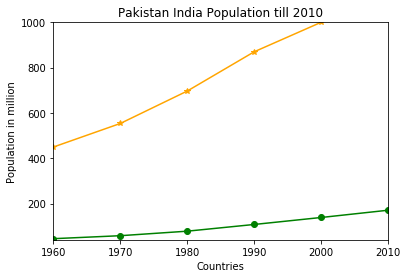

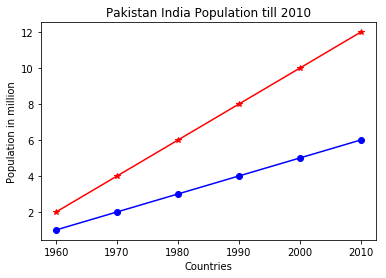

In [13]:
year = [1960, 1970, 1980, 1990, 2000, 2010]
pop_pakistan = [44.91, 58.09, 78.07, 107.7, 138.5, 170.6]
pop_india = [449.48, 553.57, 696.783, 870.133, 1000.4, 1309.1]



fig = plt.figure()
plt_res = plt.subplot(111)
plt_res.plot(year, pop_pakistan, color='g', marker ='o')
plt_res.plot(year, pop_india, color='orange', marker ='*')
plt.xlabel('Countries')
plt.ylabel('Population in million')
plt.title('Pakistan India Population till 2010')
plt.axis([1960, 2010,40, 1000])
plt.show()

fig.savefig('resources/results/test1',dpi=100)

fig = plt.figure()
plt_res = plt.subplot(111)
plt_res.plot(year, [1,2,3,4, 5,6], color='b', marker ='o')
plt_res.plot(year, [2, 4, 6,8, 10, 12], color='r', marker ='*')
plt.xlabel('Countries')
plt.ylabel('Population in million')
plt.title('Pakistan India Population till 2010')
#plt.axis([1960, 2010,40, 1000])
plt.show()

fig.savefig('resources/results/test2',dpi=100)












#plt.savefig('resources/results/grid_resolution_error.png')

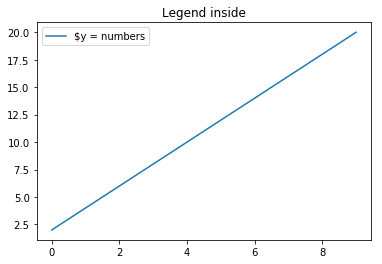

In [55]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

y = [2,4,6,8,10,12,14,16,18,20]
x = np.arange(10)
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(x, y, label='$y = numbers')
plt.title('Legend inside')
ax.legend()
#plt.show()

fig.savefig('resources/results/plot.png')

In [11]:
from sklearn import preprocessing

positions, df_points_all = read_data('resources/data/LocTreino_Equipe_2.csv')

df_points_test = pd.DataFrame()

all_indices = set(range(len(df_points_all)))

indices_test = sample(list(all_indices), int(len(df_points_all)/10))

indices_train = list(all_indices.difference(indices_test))

df_points = df_points_all.iloc[indices_train, :]

df_points_test = df_points_all.iloc[indices_test, :]

fingerprint_cols = ['pathBTS1','pathBTS2','pathBTS3','pathBTS4','pathBTS5','pathBTS6']
        
targets = [df_points[t_c] for t_c in fingerprint_cols]
    
position_columns = ['lat', 'lon']
        
input_features = df_points[position_columns].values

scaler = preprocessing.MaxAbsScaler().fit(input_features)

print(input_features)
print(scaler.transform(input_features))
print(scaler.inverse_transform(input_features))

#print(input_features)

[[ -8.076634 -34.899639]
 [ -8.065599 -34.887295]
 [ -8.06857  -34.896713]
 ...
 [ -8.070547 -34.893032]
 [ -8.065841 -34.892071]
 [ -8.06663  -34.901073]]
[[0.05133831 0.3304232 ]
 [0.6565928  0.89762441]
 [0.49363756 0.46487157]
 ...
 [0.38520184 0.63401185]
 [0.64331944 0.67816937]
 [0.60004388 0.26453154]]
[[ -8.22482319 -35.66635084]
 [ -8.224622   -35.6660822 ]
 [ -8.22467617 -35.66628717]
 ...
 [ -8.22471221 -35.66620706]
 [ -8.22462641 -35.66618614]
 [ -8.2246408  -35.66638205]]


In [17]:
import time

start_time = time.time()
print(start_time)
for i in range(0, 30000):
    x = i;
end_time = time.time()
spent_time = end_time - start_time
print(spent_time)
#time.strftime("%H:%M:%S", spent_time.se)
print(spent_time.seconds)

1557173060.477911
0.0030019283294677734


AttributeError: 'float' object has no attribute 'seconds'

In [6]:
import datetime
start = datetime.datetime.now()
for i in range(0, 2500):
    t = i * 2
end = datetime.datetime.now()
elapsed = end - start
print(elapsed)
# or
print(elapsed.microseconds)

0:00:00.001001
1001


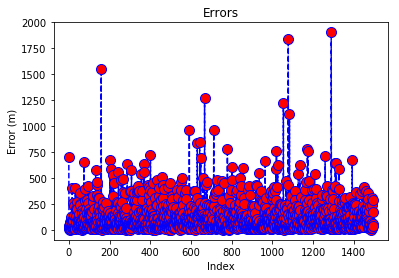

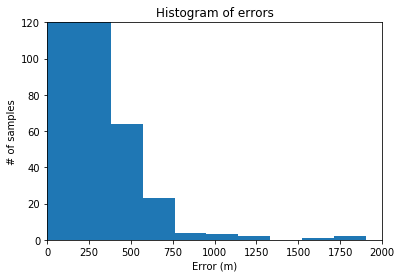

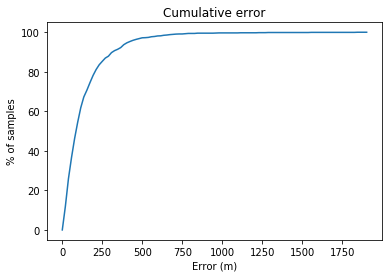

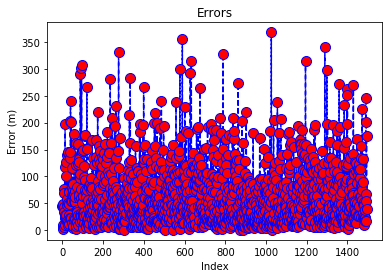

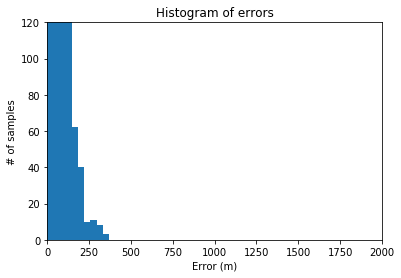

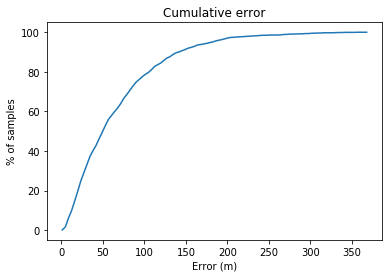

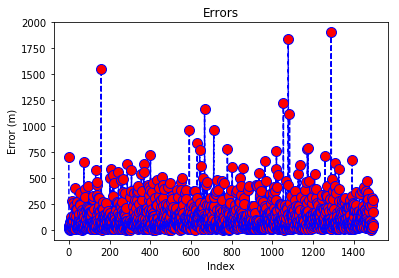

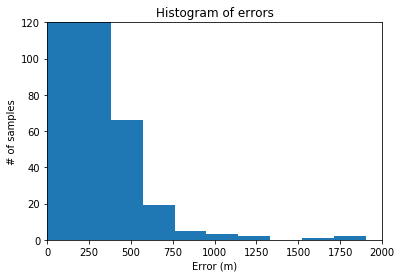

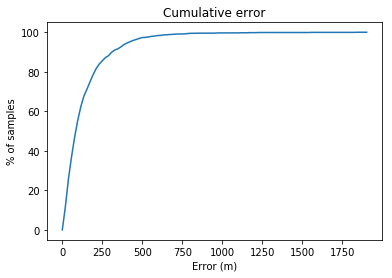

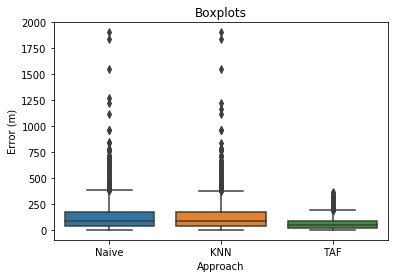

In [117]:
show_stats_graphs(errors_naive)
show_stats_graphs(errors_taf)
show_stats_graphs(errors_knn)
show_box_plots([errors_naive, errors_knn, errors_taf], ['Naive', 'KNN', 'TAF'])

In [17]:
cells = [ 1, 2, 3, 4]
np.mean(cells)

2.5

Análise de Dados
==

In [25]:
df_points_all.describe()

,pontoId,lat,lon,pathBTS1,pathBTS2,pathBTS3,pathBTS4,pathBTS5,pathBTS6,taBTS1,taBTS2,taBTS3,taBTS4,taBTS5,taBTS6
count,1497.000000,1497.000000,1497.000000,1497.000000,1497.000000,1497.000000,1497.000000,1497.000000,1497.000000,1497.000000,1497.000000,1497.000000,1497.000000,1497.000000,1497.000000
mean,1506.504342,-8.069919,-34.894956,117.568644,118.876237,123.780815,116.064967,121.791164,125.109213,0.680027,1.079446,2.577297,1.042752,1.098864,1.036740
std,864.839304,0.004325,0.004359,20.507860,12.334898,9.223450,12.446132,12.360117,13.490190,0.706980,1.323937,1.424973,0.844637,0.848626,0.680604
min,2.000000,-8.077570,-34.906830,85.590000,76.423333,88.740000,83.640000,79.290000,87.823333,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,755.000000,-8.073171,-34.897587,106.990000,111.290000,119.190000,106.690000,114.490000,115.590000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000
50%,1492.000000,-8.069860,-34.895496,118.256667,120.140000,124.440000,116.523333,123.190000,128.223333,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,2274.000000,-8.066664,-34.891747,125.656667,128.156667,129.990000,126.056667,130.523333,135.723333,1.000000,1.000000,3.000000,1.000000,2.000000,2.000000
max,2956.000000,-8.059338,-34.885067,636.694439,144.890000,144.790000,145.023333,146.890000,150.123333,3.000000,35.327245,30.683919,4.000000,3.000000,2.000000


Saving Output Files
==

In [26]:
dic = {'pontoId':df_points_test['pontoId'],
       'lat':df_points_test['lat'],
       'lon':df_points_test['lon'],
       'lat_pred':[lat for lat, lon in pred_positions_taf],
       'lon_pred':[lon for lat, lon in pred_positions_taf],
       'erro_loc':errors_taf}
df_results = pd.DataFrame(dic,columns=dic.keys())
df_results.to_csv('resources/data/Resultados.csv')

In [ ]:
import scipy.stats as scp
error_1 = [27,2,4,18,7,9]
error_2 = [20, 8, 14, 36, 21,22]
error_3 = [34, 31,3,23, 30,6]

scp.stats.friedmanchisquare(errors_naive,
                            errors_knn,
                            errors_taf)

##Archive